In [23]:
import math
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
from scipy.integrate import quad
# Helpers
def dN(x):
    ''' Prob dencity function of standart norm rand variable x'''
    return math.exp(-0.5* x**2) /math.sqrt(2 * math.pi)
def N(d):
    ''' Cummulative dencity function'''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    ''' Black-Sholes d1 function'''
    d1 = (math.log(St/K) + (r + 1/2*sigma**2) *(T - t)) / (sigma * math.sqrt(T - t))
    return d1

def BSM_call_value(St, K, t, T, r, sigma):
    '''Calculate Black-Sholes European call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma*math.sqrt(T - t)
    call_value = St * N(d1) - K * math.exp(-r*(T-t)) * N(d2)
    return call_value
def BSM_put_value(St, K, t, T, r, sigma):
    ''' Calculate Black-Scholes European put option'''
    put_value = BSM_call_value(St, K, t, T, r, sigma) - St + math.exp(-r * (T-t)) *K
    return put_value

In [30]:
# Plot
''' Plot Europ option calues for different parameters c.p'''
def plot_values(function):
    plt.figure(figsize=(10, 8.3))
    points = 100

    #Model params

    St = 100.0
    K = 100.0
    t = 0.
    T = 1.
    r = 0.05
    sigma =0.2

    # C(K)plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points)
    vlist =[function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid(True)
    plt.xlabel('strike $K$')
    plt.ylabel('present value')

    #C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')

     # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0., 0.1, points)
    vlist = [function(St, K, t, T, r_, sigma) for r_ in rlist]
    plt.plot(rlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')

    # Sigma plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma_) for sigma_ in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()
    plt.show()





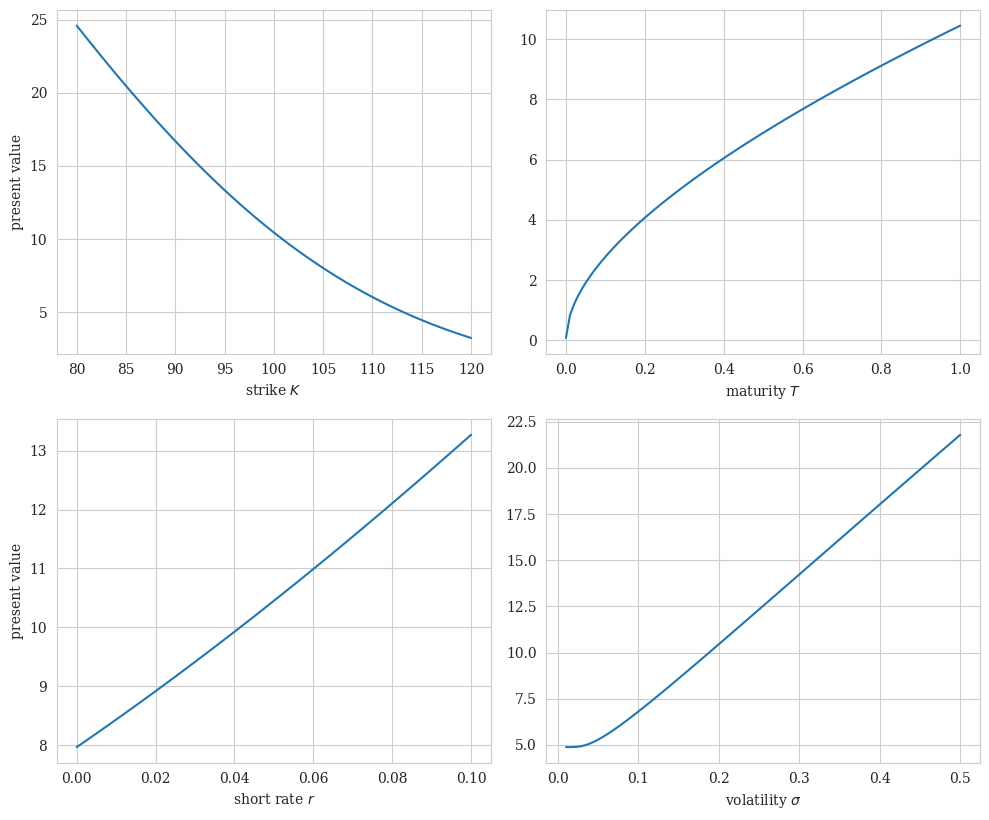

In [31]:
plot_values(BSM_call_value)

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

from Finance.DerPy.BSM import d1f, N, dN

def BSM_delta(St, K, t, T, r, sigma):
    ''' Black-Sholes Delta'''
    d1 = d1f(St, K, t, T, r, sigma)
    delta = N(d1)
    return delta
def BSM_gamma(St, K, t, T, r, sigma):
    ''' Black sholes Gamma of european call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    gamma = dN(d1) / (St * sigma * np.sqrt(T - t))
    return gamma
def BSM_theta(St, K, t, T, r, sigma):
    ''' Black sholes Theta of european call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 -sigma *np.sqrt(T-t)
    theta = (-St * dN(d1) * sigma / (2 * math.sqrt(T - t))
         - r * K * np.exp(-r * (T - t)) * N(d2))
    return theta
def BSM_rho(St, K, t, T, r, sigma):
    ''' Black sholes Rho of european call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 -sigma *np.sqrt(T-t)
    rho = K * (T-t) * np.exp(-r *(T-t)) * N(d2)
    return rho
def BSM_vega(St, K, t, T, r, sigma):
    ''' Black sholes Vega of european call option'''
    d1 = d1f(St, K, t, T, r, sigma)
    vega = dN(d1) *St  * np.sqrt(T - t)
    return vega


In [42]:
def plot_greeks(function, greek):
    # Model params
    St = 100.0
    t = 0.
    r = 0.05
    sigma = 0.2

    # Strike and maturity ranges
    klist = np.linspace(80, 120, 25)
    tlist = np.linspace(0.01, 1, 25)

    # Value grid
    V = np.zeros((len(tlist), len(klist)), dtype=float)
    for i in range(len(tlist)):
        for j in range(len(klist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)

    # Mesh for plotting
    K_grid, T_grid = np.meshgrid(klist, tlist)

    # Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(K_grid, T_grid, V, cmap='viridis')
    ax.set_xlabel('Strike $K$')
    ax.set_ylabel('Maturity $T$')
    ax.set_zlabel('%s(K, T)' % greek)
    ax.set_title('%s Surface' % greek)
    plt.tight_layout()
    plt.show()


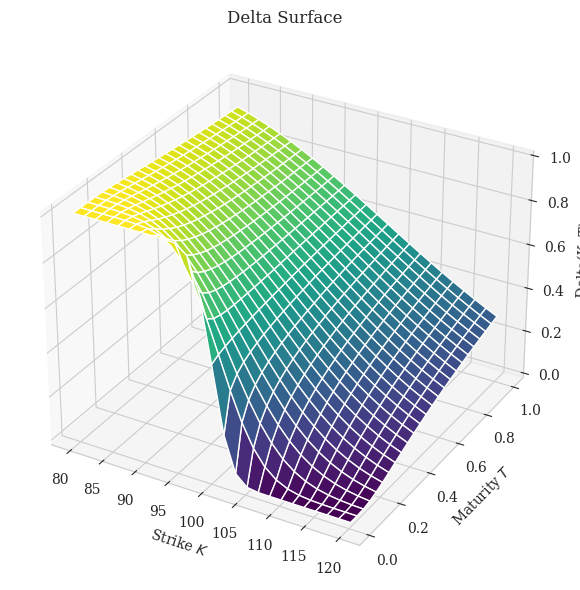

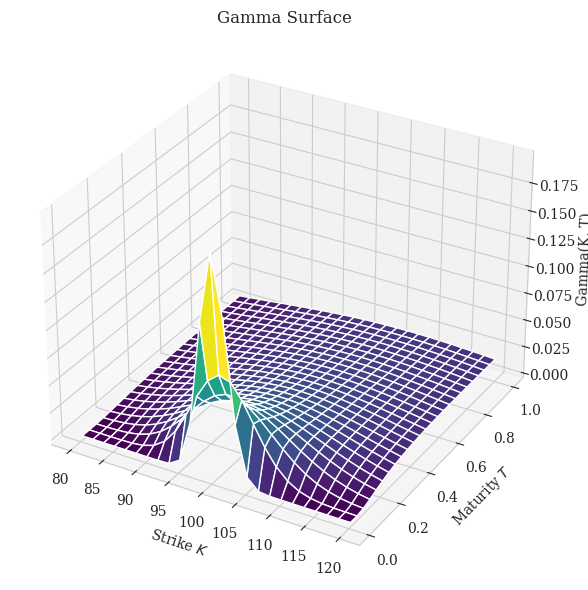

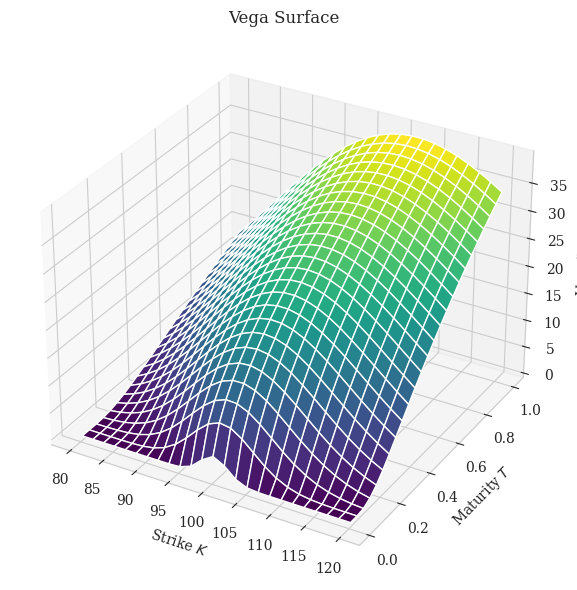

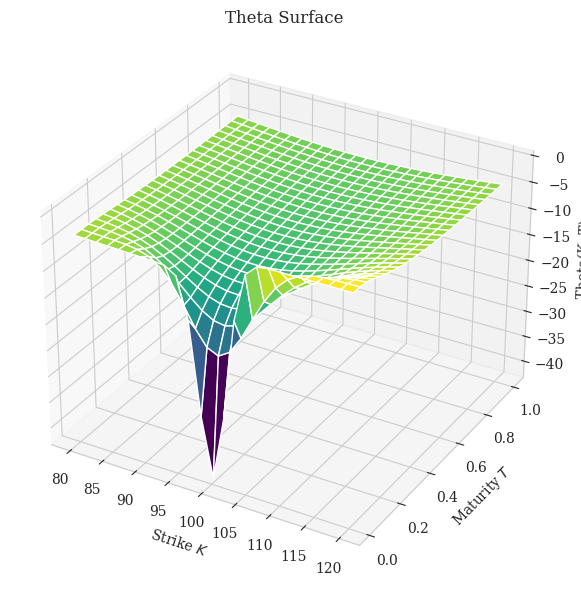

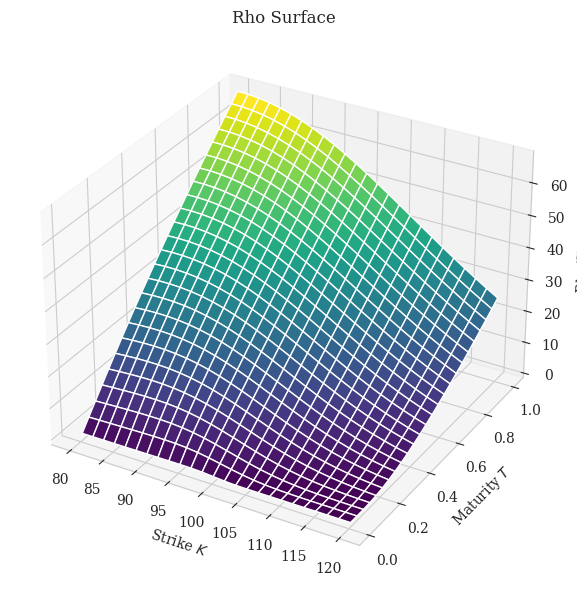

In [48]:
plot_greeks(BSM_delta, 'Delta')
plot_greeks(BSM_gamma, 'Gamma')
plot_greeks(BSM_vega, 'Vega')
plot_greeks(BSM_theta, 'Theta')
plot_greeks(BSM_rho, 'Rho')


TypeError: BSM_delta() missing 6 required positional arguments: 'St', 'K', 't', 'T', 'r', and 'sigma'